# 제 5회 L.Point Big Data Competition - Digital Trend Analyzer



## 1.Import Data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)

In [ ]:
df_Product = pd.read_csv('Data//01_Product.csv')
df_Search1 = pd.read_csv('Data//02_Search1.csv')
df_Search2 = pd.read_csv('Data//03_Search2.csv')
df_Custom = pd.read_csv('Data//04_Custom.csv')
df_Session = pd.read_csv('Data//05_Session.csv')
df_Master = pd.read_csv('Data//06_Master.csv')

C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
len(df_Session)

2712907

In [4]:
df_Product.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
0,4139680,7605037,12,642112,색상:워터멜론,[바비브라운],"39,000",1
1,4140076,10189797,13,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트,"39,000",2
2,4142395,6158159,85,179538,(not set),[아베다],"39,000",1
3,4144914,7935714,12,554336,색상:블랙|사이즈:160cm(12~13세) / 1개,아디다스 키즈,"39,000",1
4,4144917,6406509,78,190306,5개,데코르테,"39,000",5


In [5]:
df_Search1.head()

,CLNT_ID,SESS_ID,KWD_NM,SEARCH_CNT
0,5607714,7112876,빌리프 아이크림,6
1,5607714,4090791,프리메라 마스크팩,3
2,5607714,4090791,여성청결제,1
3,5612428,1876482,명품가방,1
4,5612428,658123,콩순이 아이스크림,1


In [6]:
df_Search2.head()

,SESS_DT,KWD_NM,SEARCH_CNT
0,20180407,닥스원피스,8
1,20180407,닥터지 브라이트닝,1
2,20180407,달팡 인트랄,2
3,20180407,대상트,1
4,20180407,더블유닷,6


In [7]:
df_Custom.head()

,CLNT_ID,CLNT_GENDER,CLNT_AGE
0,4830726,F,30
1,4830874,F,40
2,4830975,F,30
3,4831275,F,30
4,4825325,F,30


In [8]:
df_Session.head()

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM
0,5873599,8641867,9,20180509,82.0,"1,890",mobile,Daejeon,Daejeon
1,5873599,6616320,21,20180611,105.0,"1,604",mobile,Busan,Busan
2,5873599,5886172,40,20180624,41.0,632,mobile,Daejeon,Daejeon
3,5873884,1050889,15,20180913,160.0,"1,035",mobile,Gyeonggi-do,Anyang
4,5874461,10298270,5,20180412,13.0,298,mobile,Seoul,Seoul


In [9]:
df_Master.head()

,PD_C,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM
0,64382,언더아머 남성 UA HG 아머 모크 LS 1289559-001 - 블랙 / MD[95],스포츠패션,남성일반스포츠의류,남성스포츠티셔츠
1,62282,여자 플라워덧신 2족선물세트 17403-2set,속옷/양말/홈웨어,여성양말류,여성일반양말
2,61729,88A2933253배트맨스웨트티 - 블랙 / 130,유아동의류,유아의류상의,영유아티셔츠/탑
3,61537,"닥터마틴 아드리안 블랙, 체리레드 - 02_체리레드 / 250mm(6)",패션잡화,남성화,남성부츠
4,58820,여성 그레이 스트라이프 퍼프 소매 블라우스 (128865YQ33) - 회색(앤틱실버...,남성의류,남성의류상의,남성남방셔츠


## 1. 결측값 및 이상치 확인

### 1) Product

In [10]:
#Missing Values
df_Product.isna().sum()

CLNT_ID      0
SESS_ID      0
HITS_SEQ     0
PD_C         0
PD_ADD_NM    0
PD_BRA_NM    0
PD_BUY_AM    0
PD_BUY_CT    0
dtype: int64

In [11]:
#Data type
df_Product.dtypes

CLNT_ID       int64
SESS_ID       int64
HITS_SEQ      int64
PD_C          int64
PD_ADD_NM    object
PD_BRA_NM    object
PD_BUY_AM    object
PD_BUY_CT    object
dtype: object

In [12]:
df_Product.CLNT_ID = df_Product.CLNT_ID.astype(int)
df_Product.SESS_ID = df_Product.SESS_ID.astype(int)
df_Product.HITS_SEQ = df_Product.HITS_SEQ.astype(int)
df_Product.PD_C = df_Product.PD_C.astype(int)
df_Product.PD_ADD_NM = df_Product.PD_ADD_NM.astype(str)
df_Product.PD_BRA_NM = df_Product.PD_BRA_NM.astype(str)
df_Product.PD_BUY_AM = df_Product.PD_BUY_AM.apply(lambda x : str(x).replace(",","")).astype(int)
df_Product.PD_BUY_CT = df_Product.PD_BUY_CT.apply(lambda x : str(x).replace(",","")).astype(int)

In [13]:
# Data type Again
df_Product.dtypes

CLNT_ID       int32
SESS_ID       int32
HITS_SEQ      int32
PD_C          int32
PD_ADD_NM    object
PD_BRA_NM    object
PD_BUY_AM     int32
PD_BUY_CT     int32
dtype: object

### 2) Search1

In [14]:
#Missing Values
df_Search1.isna().sum()

CLNT_ID       0
SESS_ID       0
KWD_NM        0
SEARCH_CNT    0
dtype: int64

In [15]:
# Data type
df_Search1.dtypes

CLNT_ID        int64
SESS_ID        int64
KWD_NM        object
SEARCH_CNT     int64
dtype: object

In [16]:
df_Search1.CLNT_ID = df_Search1.CLNT_ID.astype(int)
df_Search1.SESS_ID = df_Search1.SESS_ID.astype(int)
df_Search1.KWD_NM = df_Search1.KWD_NM.astype(str)
df_Search1.SEARCH_CNT = df_Search1.SEARCH_CNT.astype(int)

In [17]:
# Data type Again
df_Search1.dtypes

CLNT_ID        int32
SESS_ID        int32
KWD_NM        object
SEARCH_CNT     int32
dtype: object

### 3) Search2

In [18]:
#Missing Values
df_Search2.isna().sum()

SESS_DT       0
KWD_NM        0
SEARCH_CNT    0
dtype: int64

In [19]:
# Data type
df_Search2.dtypes

SESS_DT        int64
KWD_NM        object
SEARCH_CNT    object
dtype: object

In [20]:
df_Search2.SESS_DT = pd.to_datetime(df_Search2.SESS_DT,format="%Y%m%d")
df_Search2.KWD_NM = df_Search2.KWD_NM.astype(str)
df_Search2.SEARCH_CNT = df_Search2.SEARCH_CNT.apply(lambda x : str(x).replace(",","")).astype(int)

In [21]:
# Data type Again
df_Search2.dtypes

SESS_DT       datetime64[ns]
KWD_NM                object
SEARCH_CNT             int32
dtype: object

### 4) Custom

In [22]:
#Missing Values
df_Custom.isna().sum()

CLNT_ID        0
CLNT_GENDER    0
CLNT_AGE       0
dtype: int64

In [23]:
#Data Type
df_Custom.dtypes

CLNT_ID         int64
CLNT_GENDER    object
CLNT_AGE        int64
dtype: object

In [24]:
df_Custom.CLNT_ID = df_Custom.CLNT_ID.astype(int)
df_Custom.CLNT_GENDER = df_Custom.CLNT_GENDER.astype(str)
df_Custom.CLNT_AGE = df_Custom.CLNT_AGE.astype(int)

In [25]:
#Data Type again
df_Custom.dtypes

CLNT_ID         int32
CLNT_GENDER    object
CLNT_AGE        int32
dtype: object

### 5) Session

In [26]:
#Missing Values
df_Session.isna().sum()

CLNT_ID                0
SESS_ID                0
SESS_SEQ               0
SESS_DT                0
TOT_PAG_VIEW_CT      274
TOT_SESS_HR_V      14202
DVC_CTG_NM             0
ZON_NM                 0
CITY_NM                0
dtype: int64

In [27]:
df_Session.dtypes

CLNT_ID              int64
SESS_ID              int64
SESS_SEQ             int64
SESS_DT              int64
TOT_PAG_VIEW_CT    float64
TOT_SESS_HR_V       object
DVC_CTG_NM          object
ZON_NM              object
CITY_NM             object
dtype: object

In [28]:
#TOT_PAG_VIEW_CT가 0인 경우
sum(df_Session.TOT_PAG_VIEW_CT == 0)

0

In [29]:
#TOT_SESS_HR_V가 0인 경우
sum(df_Session.TOT_SESS_HR_V == '0')

0

In [30]:
len(df_Session[df_Session.TOT_PAG_VIEW_CT.isna()|df_Session.TOT_SESS_HR_V.isna()])/len(df_Session)

0.005238292355764499

In [31]:
df_Session[df_Session.TOT_PAG_VIEW_CT.isna()].head()

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM
11409,5075856,6836578,19,20180608,NaN,NaN,mobile,Seoul,Seoul
26628,5368135,4391880,10,20180718,NaN,NaN,mobile,Chungcheongnam-do,Yeongi-gun
43241,5687186,852560,40,20180916,NaN,NaN,mobile,Seoul,Seoul
58494,6104032,1568619,78,20180904,NaN,NaN,mobile,Chungcheongnam-do,Cheonan-si
64700,3735745,6884635,1,20180607,NaN,NaN,desktop,Gwangju,Gwangju


In [32]:
df_Session[df_Session.TOT_PAG_VIEW_CT.isna()&~df_Session.TOT_SESS_HR_V.isna()]

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM
67340,401333,3950587,5,20180725,NaN,"1,583",mobile,Seoul,Seoul
395208,3449659,4394290,1,20180718,NaN,18,desktop,Busan,Busan
817841,3309257,2890087,20,20180813,NaN,9,mobile,Seoul,Seoul
1153340,19441,6220093,1,20180618,NaN,5,desktop,Gyeonggi-do,Hwaseong-si
1196086,5483124,5361386,1,20180702,NaN,44,desktop,Chungcheongbuk-do,Okcheon-gun
1198860,3436252,3960033,5,20180725,NaN,2,mobile,Gyeonggi-do,Gimpo-si
1669417,99352,6907444,1,20180607,NaN,53,desktop,Gyeonggi-do,Siheung-si
2136810,2549138,5905220,1,20180623,NaN,1,desktop,Gwangju,Gwangju
2165594,2458359,3251800,1,20180806,NaN,2,desktop,Daejeon,Daejeon


In [33]:
#TOT_PAG_VIEW_CT 와 TOT_SESS_HR_V가 모두 NaN인 경우
len(df_Session[(df_Session.TOT_PAG_VIEW_CT.isna())&df_Session.TOT_SESS_HR_V.isna()])/len(df_Session[df_Session.TOT_PAG_VIEW_CT.isna()])

0.9671532846715328

In [34]:
df_Session[df_Session.TOT_SESS_HR_V.isna()].head()

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM
38,5878756,7465325,5,20180529,1.0,NaN,mobile,Chungcheongnam-do,Cheonan-si
64,6065738,9564520,26,20180424,1.0,NaN,mobile,Gyeonggi-do,Gwangmyeong-si
65,6065738,9564529,25,20180424,1.0,NaN,mobile,Gyeonggi-do,Gwangmyeong-si
246,6003295,1035552,2,20180913,1.0,NaN,desktop,Daejeon,Daejeon
604,5946142,9600252,4,20180423,1.0,NaN,mobile,Seoul,Seoul


In [35]:
#TOT_PAG_VIEW_CT == 1 이고 TOT_SESS_HR_V는 NaN인 경우
len(df_Session[(df_Session.TOT_PAG_VIEW_CT == 1)&df_Session.TOT_SESS_HR_V.isna()])/len(df_Session[df_Session.TOT_SESS_HR_V.isna()])

0.9766230108435432

In [36]:
df_Session[(df_Session.TOT_PAG_VIEW_CT>1)&df_Session.TOT_SESS_HR_V.isna()].head()

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM
18500,3107805,2566536,78,20180818,2.0,NaN,mobile,Seoul,Seoul
36640,5586415,10670905,26,20180405,2.0,NaN,desktop,Seoul,Seoul
73380,1217492,8268389,70,20180515,2.0,NaN,mobile,Ulsan,Ulsan
88197,470431,5465686,15,20180701,2.0,NaN,mobile,Busan,Busan
93259,784998,6224692,23,20180618,2.0,NaN,mobile,Seoul,Seoul


In [37]:
len(df_Session[(df_Session.TOT_PAG_VIEW_CT>1)&df_Session.TOT_SESS_HR_V.isna()])

67

In [38]:
df_Session[(df_Session.TOT_PAG_VIEW_CT>3)&df_Session.TOT_SESS_HR_V.isna()].head()

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM
2167579,5576226,3968457,2,20180725,7.0,NaN,desktop,Seoul,Seoul
2167580,5576226,3435063,5,20180803,5.0,NaN,desktop,Seoul,Seoul


#### NaN처리 방법

#### 1. 결측값이 전체 데이터의 0.005에 불과하므로 결측값을 제거하고 남은 데이터만 이용한다.

#### 2. 결측값을 0으로 대체


##### TOT_SESS_HR_V의 NaN 값은 세션 내에서 1초 이내동안만 머물렀기 때문 값이 입력이 되지 않은 것으로 생각된다. TOT_SESS_HR_V의 값이 0인 경우가 없다는 점과, TOT_PAG_VIEW_CT 변수는 1이면서 TOT_SESS_HR_V의 값이 NaN인 경우가 97%이상이며 TOT_SESS_HR_V가 NaN일 때 TOT_PAG_VIEW_CT의 최대값이 7이라는 점이 이를 방증해준다. 

##### 또한 TOT_PAG_VIEW_CT역시 0값이 존재하지 않으며 96%이상이 TOT_SESS_HR_V가 NaN일 때, 즉 세션 내에 머문 시간이 1초 이내일 떄 NaN값을 보인다. TOT_SESS_HR_V가 NaN이 아님에도 TOT_PAG_VIEW_CT가 NaN인 경우는 세션의 오류로 인해 페이지 뷰 수가 늘어나지 않은 것으로 사려된다. 

##### 따라서 이 두 변수에서의 NaN을 0으로 설정한다.

In [39]:
df_Session_new = df_Session.copy()
df_Session_new.TOT_PAG_VIEW_CT = df_Session_new.TOT_PAG_VIEW_CT.fillna(0)
df_Session_new.TOT_SESS_HR_V = df_Session_new.TOT_SESS_HR_V.fillna(0)

In [40]:
df_Session_new.CLNT_ID = df_Session_new.CLNT_ID.astype(int)
df_Session_new.SESS_ID = df_Session_new.SESS_ID.astype(int)
df_Session_new.SESS_SEQ = df_Session_new.SESS_SEQ.astype(int)
df_Session_new.SESS_DT = pd.to_datetime(df_Session_new.SESS_DT,format="%Y%m%d")
df_Session_new.TOT_PAG_VIEW_CT = df_Session_new.TOT_PAG_VIEW_CT.astype(int)
df_Session_new.TOT_SESS_HR_V = df_Session_new.TOT_SESS_HR_V.apply(lambda x : str(x).replace(",","")).astype(int)
df_Session_new.DVC_CTG_NM = df_Session_new.DVC_CTG_NM.astype(str)
df_Session_new.ZON_NM = df_Session_new.ZON_NM.astype(str)
df_Session_new.CITY_NM = df_Session_new.CITY_NM.astype(str)

In [41]:
df_Session_new.dtypes

CLNT_ID                     int32
SESS_ID                     int32
SESS_SEQ                    int32
SESS_DT            datetime64[ns]
TOT_PAG_VIEW_CT             int32
TOT_SESS_HR_V               int32
DVC_CTG_NM                 object
ZON_NM                     object
CITY_NM                    object
dtype: object

### 6) Master

In [42]:
df_Master.isna().sum()

PD_C        0
PD_NM       0
CLAC1_NM    0
CLAC2_NM    0
CLAC3_NM    0
dtype: int64

In [43]:
df_Master.dtypes

PD_C         int64
PD_NM       object
CLAC1_NM    object
CLAC2_NM    object
CLAC3_NM    object
dtype: object

In [44]:
df_Master.PD_C = df_Master.PD_C.astype(int)
df_Master.PD_NM = df_Master.PD_NM.astype(str)
df_Master.CLAC1_NM = df_Master.CLAC1_NM.astype(str)
df_Master.CLAC2_NM = df_Master.CLAC2_NM.astype(str)
df_Master.CLAC3_NM = df_Master.CLAC3_NM.astype(str)

In [45]:
df_Master.dtypes

PD_C         int32
PD_NM       object
CLAC1_NM    object
CLAC2_NM    object
CLAC3_NM    object
dtype: object

## 2. 탐색적 데이터 분석

### 1) Product

In [50]:
df_Product.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
0,4139680,7605037,12,642112,색상:워터멜론,[바비브라운],39000,1
1,4140076,10189797,13,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트,39000,2
2,4142395,6158159,85,179538,(not set),[아베다],39000,1
3,4144914,7935714,12,554336,색상:블랙|사이즈:160cm(12~13세) / 1개,아디다스 키즈,39000,1
4,4144917,6406509,78,190306,5개,데코르테,39000,5


In [51]:
#총 상호작용 수
n_interactions = len(df_Product)

#클라이언트 수
n_CLNT_ID = len(set(df_Product.CLNT_ID))

#세선 수
n_SESS_ID = len(set(df_Product.SESS_ID))

# 클라이언트 별 평균 고유 세션 수
n_unique_SESS_per_CLNT = \
df_Product.SESS_ID.groupby(df_Product.CLNT_ID).nunique().mean()

# 클라이언트 별 평균 세션 수 
SESS_per_CLNT = \
df_Product.SESS_ID.groupby(df_Product.CLNT_ID).count().mean()

# 상품 브랜드 수
n_PD_BRA_NM = len(set(df_Product.PD_BRA_NM))

# 상품 코드 수
n_PD_C = len(set(df_Product.PD_C))

#평균 구매 금액
n_BUY = np.mean(df_Product.PD_BUY_AM*df_Product.PD_BUY_CT)

# 클라이언트 별 평균 구매 상품 건수
n_PD_C_per_CLNT = df_Product.PD_C.groupby(df_Product.CLNT_ID).count().mean()

print(\
'상호작용 수 : %d 회\n\
클라이언트 수 : %d 명\n\
세션 수 : %d 개\n\
클라이언트 별 평균 고유 세션 수 : %.2f 개\n\
클라이언트 별 평균 세션 수 : %.2f 개\n\
상품 브랜드 수 : %d 개\n\
상품 코드 수 : %d 개\n\
평균 구매 금액 : %.2f 원\n\
클라이언트별 평균 구매상품 건수 : %.2f 건'%(n_interactions,n_CLNT_ID,n_SESS_ID,n_unique_SESS_per_CLNT,\
               SESS_per_CLNT,n_PD_BRA_NM,n_PD_C,n_BUY,n_PD_C_per_CLNT))
      




상호작용 수 : 5024906 회
클라이언트 수 : 922737 명
세션 수 : 2425886 개
클라이언트 별 평균 고유 세션 수 : 2.94 개
클라이언트 별 평균 세션 수 : 5.45 개
상품 브랜드 수 : 22716 개
상품 코드 수 : 847652 개
평균 구매 금액 : 54089.34 원
클라이언트별 평균 구매상품 건수 : 5.45 건


In [52]:
#구매 금액
BUY = round(df_Product.PD_BUY_AM*df_Product.PD_BUY_CT)
BUY.describe().round(2)

count     5024906.00
mean        54089.34
std        127671.25
min            10.00
25%         14000.00
50%         29000.00
75%         53000.00
max      39000000.00
dtype: float64

In [53]:
df_Product[df_Product.PD_BUY_AM*df_Product.PD_BUY_CT>10000000]

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
139203,5431377,1150072,8,228634,상품명:랑방 메리미 EDP 30ML,[코익퍼퓸(화장품)],41500,264
1600769,2888052,3726340,28,709299,순서_품번_컬러:02_F1XKZ0502_BPI|사이즈:245 / 280개,휠라 슈즈,69000,280
1647207,2888052,3745284,73,709299,순서_품번_컬러:03_F1XKZ0503_SVR|사이즈:250 / 280개,휠라 슈즈,69000,280
2013521,820884,5051994,74,718518,290개,정관장,80000,290
2479620,820884,5051994,47,1955,390개,정관장,100000,390
3166600,820884,1963767,48,657768,모델명:홍삼정플러스240 / 100개,정관장,198000,100
3169130,807356,4337377,12,630476,(not set),[포트메리온],259000,50
3250832,807356,4948427,5,630476,(not set),[포트메리온],259000,100
3307627,807356,6099635,26,630476,(not set),[포트메리온],259000,120
3378925,1980481,5499653,48,495053,폐가전수거요청:있음 / 3개,LG전자,3642540,3


In [54]:
def IQR_filter(data):
    # Computing IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    # Filtering Values between Q1-1.5IQR and Q3+1.5IQR
    data_filtered = data[(data>Q1-1.5*IQR)&(data<Q3+1.5*IQR)]
    return data_filtered

In [55]:
BUY_filtered = IQR_filter(BUY)
BUY_filtered.describe().round(2)

count    4572297.00
mean       31897.05
std        24385.17
min           10.00
25%        12900.00
50%        25900.00
75%        43040.00
max       111480.00
dtype: float64

C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


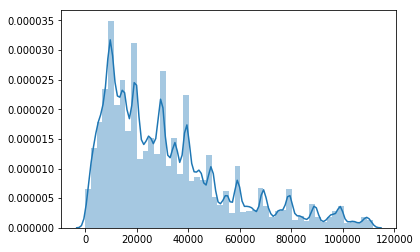

In [56]:
sns.distplot(BUY_filtered)

클라이언트가 한번 접속 시 마다 평균 2-3개의 세션을 약 2번 씩 옮겨다닌다.


클라이언트는 평균적으로 5-6개의 물품을 구매한다.


클라이언트가 한번 구매하는 물품의 가격은 평균 54000원 정도 이다. 그러나 75% 수준이 53000원이고, 가장 많은 금액을 쓴 사람은 한번에 3900만원을 사용하였다. IQR1.5 선에서 데이터를 필터링하고 히스토그램을 살펴보았는데, 그래프가 positively skewed 되어 있었다. Feature engineering 시 log transfomration을 사용 해야 할 것으로 보인다

### 2) Search1

In [57]:
df_Search1.head()

,CLNT_ID,SESS_ID,KWD_NM,SEARCH_CNT
0,5607714,7112876,빌리프 아이크림,6
1,5607714,4090791,프리메라 마스크팩,3
2,5607714,4090791,여성청결제,1
3,5612428,1876482,명품가방,1
4,5612428,658123,콩순이 아이스크림,1


In [58]:
#총 상호작용 수
n_interactions_S1 = len(df_Search1)

#클라이언트 수
n_CLNT_ID_S1 = len(set(df_Search1.CLNT_ID))

#세선 수
n_SESS_ID_S1 = len(set(df_Search1.SESS_ID))

# 검색 키워드 수
n_KWD_NM_S1 = len(set(df_Search1.KWD_NM))

# 클라이언트 별 평균 고유 세션 수
n_unique_SESS_per_CLNT_S1 = \
df_Search1.SESS_ID.groupby(df_Search1.CLNT_ID).nunique().mean()

# 클라이언트 별 평균 세션 수 
SESS_per_CLNT_S1 = \
df_Search1.SESS_ID.groupby(df_Search1.CLNT_ID).count().mean()

# 클라이언트 별 검색 키워드수
n_KWD_per_CLNT_S1 = \
df_Search1.KWD_NM.groupby(df_Search1.CLNT_ID).nunique().mean()


# 클라이언트 별 평균 검색 키워드 수
SEARCH_CNT_per_CLNT_MEAN_S1 = df_Search1.SEARCH_CNT.groupby(df_Search1.CLNT_ID).sum().mean()

print(\
'상호작용 수 : %d 회\n\
클라이언트 수 : %d 명\n\
세션 수 : %d 개\n\
검색키워드 수 : %.2f\n\
클라이언트 별 평균 고유 세션 수 : %.2f 개\n\
클라이언트 별 평균 세션 수 : %d 개\n\
클라이언트 별 검색 키워드수 : %d 개\n\
클라이언트 별 평균 검색 키워드 수 : %.2f 개\n\
'%(n_interactions_S1,n_CLNT_ID_S1,n_SESS_ID_S1,n_KWD_NM_S1,n_unique_SESS_per_CLNT_S1,\
               SESS_per_CLNT_S1,n_KWD_per_CLNT_S1,SEARCH_CNT_per_CLNT_MEAN_S1))
      

상호작용 수 : 2884943 회
클라이언트 수 : 511477 명
세션 수 : 1160589 개
검색키워드 수 : 81539.00
클라이언트 별 평균 고유 세션 수 : 2.39 개
클라이언트 별 평균 세션 수 : 5 개
클라이언트 별 검색 키워드수 : 5 개
클라이언트 별 평균 검색 키워드 수 : 10.77 개



In [59]:
SEARCH_S1= df_Search1.SEARCH_CNT.groupby(df_Search1.CLNT_ID).sum()
SEARCH_S1.describe().round(2)

count    511477.00
mean         10.77
std          23.62
min           1.00
25%           2.00
50%           5.00
75%          11.00
max        4053.00
Name: SEARCH_CNT, dtype: float64

In [60]:
SEARCH_S1_filtered = IQR_filter(SEARCH_S1)
SEARCH_S1_filtered.describe().round(2)

count    461627.00
mean          6.01
std           5.49
min           1.00
25%           2.00
50%           4.00
75%           8.00
max          24.00
Name: SEARCH_CNT, dtype: float64

C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


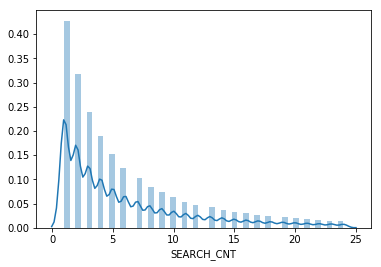

In [61]:
sns.distplot(SEARCH_S1_filtered)

### Search2

In [62]:
df_Search2.head()

,SESS_DT,KWD_NM,SEARCH_CNT
0,2018-04-07,닥스원피스,8
1,2018-04-07,닥터지 브라이트닝,1
2,2018-04-07,달팡 인트랄,2
3,2018-04-07,대상트,1
4,2018-04-07,더블유닷,6


In [63]:
df_Search2_EDA = df_Search2.copy()
df_Search2_EDA.loc[:,'Month'] = df_Search2.SESS_DT.dt.month
df_Search2_count = df_Search2_EDA.groupby([df_Search2_EDA.Month, df_Search2_EDA.KWD_NM])['SEARCH_CNT'].sum()

In [64]:
for month in range(4,10):
    print('\n%d 월'%month)
    print(df_Search2_count[month].sort_values(ascending=False).head(5))



4 월
KWD_NM
원피스         48847
블라우스        34161
에이치커넥트      32014
에고이스트       29560
써스데이아일랜드    28107
Name: SEARCH_CNT, dtype: int32

5 월
KWD_NM
원피스       59133
에이치커넥트    30454
블라우스      28029
여성샌들      27635
에고이스트     26387
Name: SEARCH_CNT, dtype: int32

6 월
KWD_NM
원피스       66320
여성샌들      48235
블라우스      28903
빈폴레이디스    25160
에고이스트     24722
Name: SEARCH_CNT, dtype: int32

7 월
KWD_NM
원피스      74965
여성샌들     40858
양산       32025
래쉬가드     28960
에고이스트    26315
Name: SEARCH_CNT, dtype: int32

8 월
KWD_NM
원피스       53132
에고이스트     26504
빈폴레이디스    22155
블라우스      21007
롱패딩       20111
Name: SEARCH_CNT, dtype: int32

9 월
KWD_NM
원피스        43360
에고이스트      29426
헤지스레이디스    28392
롱패딩        25608
빈폴레이디스     25597
Name: SEARCH_CNT, dtype: int32


사람을이 5월달부터 샌들을 찾고, 8-9월부터 롱패딩을 찾는다. 세일 이벤트 떄문일까? 그리고 에고이스트라는 브랜드를 많이 찾는다. 찾아봤는데 뭔지 잘 모르겠다

### Custom

In [65]:
df_Custom.head()

,CLNT_ID,CLNT_GENDER,CLNT_AGE
0,4830726,F,30
1,4830874,F,40
2,4830975,F,30
3,4831275,F,30
4,4825325,F,30


In [66]:
#남성/여성 비율
print('남녀 비율')
df_Custom.CLNT_GENDER.value_counts()/len(df_Custom.CLNT_GENDER)

남녀 비율


F    0.849537
M    0.150463
Name: CLNT_GENDER, dtype: float64

In [67]:
#연령 비율
print('연령 비율')
df_Custom.CLNT_AGE.value_counts()/len(df_Custom.CLNT_AGE)

연령 비율


30    0.466890
40    0.321905
20    0.141879
50    0.054526
60    0.007825
10    0.005668
70    0.001260
80    0.000048
Name: CLNT_AGE, dtype: float64

In [68]:
f3040 = len(df_Custom[(df_Custom.CLNT_GENDER == 'F') & ((df_Custom.CLNT_AGE == 30)|(df_Custom.CLNT_AGE == 40))])/len(df_Custom)
print('30-40대 여성 비율 : %.2f%%'%(f3040*100))


30-40대 여성 비율 : 67.31%


L.pay의 주요 고객층은 3-40대의 여성(67.31%)이므로 이들을 위한 타겟팅이 필요하다

### Session

In [69]:
df_Session_new.head()

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM
0,5873599,8641867,9,2018-05-09,82,1890,mobile,Daejeon,Daejeon
1,5873599,6616320,21,2018-06-11,105,1604,mobile,Busan,Busan
2,5873599,5886172,40,2018-06-24,41,632,mobile,Daejeon,Daejeon
3,5873884,1050889,15,2018-09-13,160,1035,mobile,Gyeonggi-do,Anyang
4,5874461,10298270,5,2018-04-12,13,298,mobile,Seoul,Seoul


In [70]:
#클라이언트의 평균 체류시간

HR_V_per_CLNT_MEAN = df_Session_new.TOT_SESS_HR_V.groupby(df_Session_new.CLNT_ID).mean().mean()

#클라이언트 평균 페이지 조회건수
PAG_per_CLNT_MEAN = df_Session_new.TOT_PAG_VIEW_CT.groupby(df_Session_new.CLNT_ID).mean().mean()

print(\
'클라이언트 평균 체류시간 : %.2f 분\n\
클라이언트 평균 페이지 조회건수 : %.2f 회'%(HR_V_per_CLNT_MEAN/60, PAG_per_CLNT_MEAN))

클라이언트 평균 체류시간 : 24.11 분
클라이언트 평균 페이지 조회건수 : 73.49 회


In [71]:
#사용 기기유형
print('사용 기기유형')
df_Session.DVC_CTG_NM.value_counts()/len(df_Session.DVC_CTG_NM)

사용 기기유형


mobile     0.843995
desktop    0.151560
tablet     0.004444
Name: DVC_CTG_NM, dtype: float64

In [72]:
# 사용 지역 대분류
print('사용지역 대분류')
df_Session.ZON_NM.value_counts()/len(df_Session.ZON_NM)

사용지역 대분류


Seoul                0.375923
Gyeonggi-do          0.173229
Busan                0.109086
Gyeongsangnam-do     0.047446
Daegu                0.043019
Incheon              0.037129
Gyeongsangbuk-do     0.033611
Jeollabuk-do         0.028913
Chungcheongnam-do    0.028778
Gwangju              0.026088
Daejeon              0.022279
Jeollanam-do         0.018172
Ulsan                0.017171
Chungcheongbuk-do    0.016386
Gangwon-do           0.015740
Jeju-do              0.007030
Name: ZON_NM, dtype: float64

In [73]:
# 사용 지역 대분류
print('사용지역 중분류')
(df_Session.CITY_NM.value_counts()/len(df_Session.CITY_NM))[:10]

사용지역 중분류


Seoul        0.375922
Busan        0.109086
Daegu        0.043019
Incheon      0.037129
Gwangju      0.026088
Daejeon      0.022279
Gimhae-si    0.018105
Goyang-si    0.017549
Suwon-si     0.017369
Ulsan        0.017171
Name: CITY_NM, dtype: float64

In [74]:
HR_V_per_CLNT = df_Session_new.TOT_SESS_HR_V.groupby(df_Session_new.CLNT_ID).mean()/3600
HR_V_per_CLNT.describe()

count    922737.000000
mean          0.401831
std           0.357324
min           0.000000
25%           0.165000
50%           0.307222
75%           0.522500
max           7.810000
Name: TOT_SESS_HR_V, dtype: float64

C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


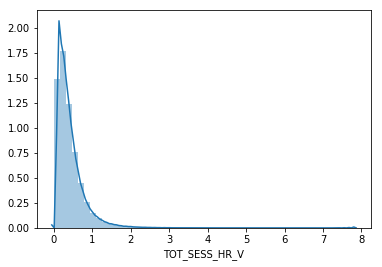

In [75]:
sns.distplot(HR_V_per_CLNT)

In [76]:
# Computing IQR

HR_V_per_CLNT_filtered = IQR_filter(HR_V_per_CLNT)
HR_V_per_CLNT_filtered.describe().round(2)

count    876047.00
mean          0.34
std           0.23
min           0.00
25%           0.16
50%           0.29
75%           0.48
max           1.06
Name: TOT_SESS_HR_V, dtype: float64

C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


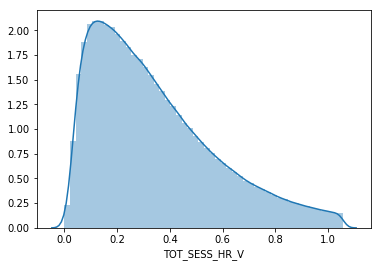

In [77]:
sns.distplot(HR_V_per_CLNT_filtered)

In [78]:
PAG_per_CLNT = df_Session_new.TOT_PAG_VIEW_CT.groupby(df_Session_new.CLNT_ID).mean()
PAG_per_CLNT.describe().round(2)

count    922737.00
mean         73.49
std          63.63
min           0.00
25%          30.00
50%          55.00
75%          96.33
max         499.00
Name: TOT_PAG_VIEW_CT, dtype: float64

C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


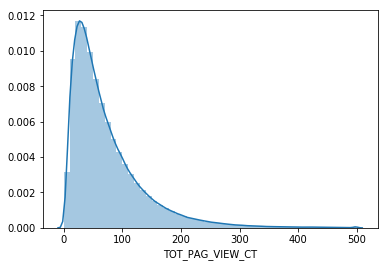

In [79]:
sns.distplot(PAG_per_CLNT)

In [80]:
PAG_per_CLNT_filtered = IQR_filter(PAG_per_CLNT)
PAG_per_CLNT_filtered.describe().round(2)

count    874935.00
mean         62.99
std          43.47
min           0.00
25%          29.00
50%          52.00
75%          87.75
max         195.82
Name: TOT_PAG_VIEW_CT, dtype: float64

C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


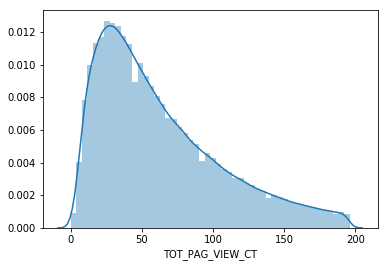

In [81]:
sns.distplot(PAG_per_CLNT_filtered)

In [82]:
#get month and week day
df_Session_new.loc[:,'MONTH'] = df_Session_new.SESS_DT.dt.month
df_Session_new.loc[:,'WKDAY'] = df_Session_new.SESS_DT.dt.weekday

### Master

In [83]:
df_Master.head()

,PD_C,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM
0,64382,언더아머 남성 UA HG 아머 모크 LS 1289559-001 - 블랙 / MD[95],스포츠패션,남성일반스포츠의류,남성스포츠티셔츠
1,62282,여자 플라워덧신 2족선물세트 17403-2set,속옷/양말/홈웨어,여성양말류,여성일반양말
2,61729,88A2933253배트맨스웨트티 - 블랙 / 130,유아동의류,유아의류상의,영유아티셔츠/탑
3,61537,"닥터마틴 아드리안 블랙, 체리레드 - 02_체리레드 / 250mm(6)",패션잡화,남성화,남성부츠
4,58820,여성 그레이 스트라이프 퍼프 소매 블라우스 (128865YQ33) - 회색(앤틱실버...,남성의류,남성의류상의,남성남방셔츠


In [84]:
#총 상품 코드 수
n_PD_C_m = len(df_Master)

#총 상품명
n_PD_NM_m = len(set(df_Master.PD_NM))

#상품 대분류 갯수
n_CLAC1_NM = len(set(df_Master.CLAC1_NM))

#상품 중분류 갯수
n_CLAC2_NM = len(set(df_Master.CLAC2_NM))

#상품 소분류 갯수
n_CLAC3_NM = len(set(df_Master.CLAC3_NM))

print(\
'총 상품 코드 수 : %d 개\n\
총 상품 개수 : %d 개\n\
상품 대분류 개수 : %d 개\n\
상품 중분류 개수 : %d 개\n\
상품 소분류 개수 : %d 개\n'\
%(n_PD_C_m,n_PD_NM_m,n_CLAC1_NM,n_CLAC2_NM,n_CLAC3_NM))


총 상품 코드 수 : 847652 개
총 상품 개수 : 817421 개
상품 대분류 개수 : 37 개
상품 중분류 개수 : 128 개
상품 소분류 개수 : 898 개



In [85]:
#상품 대분류 비율
print('상품 대분류 비율')
(df_Master.CLAC1_NM.value_counts()/len(df_Master.CLAC1_NM))[:10]

상품 대분류 비율


여성의류         0.213657
패션잡화         0.131663
스포츠패션        0.123038
남성의류         0.102858
유아동의류        0.072877
속옷/양말/홈웨어    0.072746
화장품/뷰티케어     0.035405
시즌스포츠        0.026291
문구/사무용품      0.021864
식기/조리기구      0.020669
Name: CLAC1_NM, dtype: float64

### 쇼핑몰 주요 고객

In [46]:
df_Custom_Session = pd.merge(df_Custom,df_Session_new,on='CLNT_ID',how='inner')

In [87]:
#session 사용자 중 모바일 사용 30-40 여성 비율
f3040m = len(df_Custom_Session[(df_Custom_Session.CLNT_GENDER == 'F') & ((df_Custom_Session.CLNT_AGE == 30)|(df_Custom_Session.CLNT_AGE == 40))&(df_Custom_Session.DVC_CTG_NM == 'mobile')])/len(df_Custom_Session)
print('모바일 사용 30-40대 여성 비율 : %.2f%%'%(f3040m*100))


모바일 사용 30-40대 여성 비율 : 71.74%


In [47]:
df_Product_Custom_Session = pd.merge(df_Product,df_Custom_Session,on=['CLNT_ID','SESS_ID'],how='inner')

In [89]:
len(df_Product_Custom_Session)

3988587

In [90]:
#session 사용자 중 모바일 사용 30-40 여성의 구매율
f3040m_buy = len(df_Product_Custom_Session[(df_Product_Custom_Session.CLNT_GENDER == 'F') & ((df_Product_Custom_Session.CLNT_AGE == 30)|(df_Product_Custom_Session.CLNT_AGE == 40))&(df_Product_Custom_Session.DVC_CTG_NM == 'mobile')])/len(df_Product_Custom_Session)
print('모바일 사용 30-40대 여성의 구매율 : %.2f%%'%(f3040m_buy*100))

모바일 사용 30-40대 여성의 구매율 : 73.19%


In [91]:
df_f3040m_product = df_Product_Custom_Session[(df_Product_Custom_Session.CLNT_GENDER == 'F') & ((df_Product_Custom_Session.CLNT_AGE == 30)|(df_Product_Custom_Session.CLNT_AGE == 40))&(df_Product_Custom_Session.DVC_CTG_NM == 'mobile')]

In [92]:
df_f3040m_product.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,CLNT_GENDER,CLNT_AGE,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,MONTH,WKDAY
0,4140076,10189797,13,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트,39000,2,F,40,172,2018-04-13,18,113,mobile,Gyeonggi-do,Icheon-si,4,4
1,4140076,10189797,13,411029,품번/사이즈:CY4574_회흰 / 120(XXXXL) / 1개,아디다스(의류),29000,1,F,40,172,2018-04-13,18,113,mobile,Gyeonggi-do,Icheon-si,4,4
3,4147643,4050743,66,149995,사이즈:옵션04.AN868_04 / 1개,앵글로매니아,39000,1,F,30,18,2018-07-24,73,3850,mobile,Seoul,Seoul,7,1
4,4148106,6537318,21,570603,색상:BLK0_(BLK0)BLACK|사이즈:115 / 1개,데상트,39000,1,F,30,58,2018-06-13,20,144,mobile,Gwangju,Gwangju,6,2
8,4154576,4253415,19,591229,size:S|color:오프 화이트 / 1개,망고(MANGO),39000,1,F,40,410,2018-07-20,62,3880,mobile,Seoul,Seoul,7,4


In [93]:
f3040m_buy = (df_f3040m_product.PD_BUY_AM*df_f3040m_product.PD_BUY_CT)
f3040m_buy.describe().round(2)

count     2919430.00
mean        50072.09
std        109626.01
min           100.00
25%         13900.00
50%         28900.00
75%         49900.00
max      12234000.00
dtype: float64

In [94]:
f3040m_buy_filtered = IQR_filter(f3040m_buy)
f3040m_buy_filtered.describe().round(2)

count    2662201.00
mean       30863.23
std        23065.59
min          100.00
25%        12800.00
50%        25000.00
75%        42000.00
max       103840.00
dtype: float64

C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


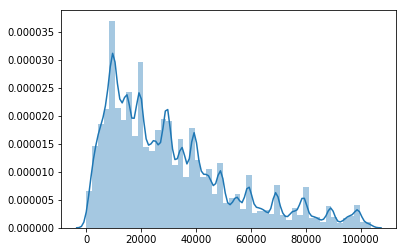

In [95]:
sns.distplot(f3040m_buy_filtered)

### 구매에 대한 정보를 모두 합치기

In [48]:
df_Product_full = pd.merge(df_Product_Custom_Session,df_Master,on ='PD_C',how='inner')
df_Product_full.sort_values(by =['CLNT_ID','SESS_SEQ']).head(10)

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,CLNT_GENDER,CLNT_AGE,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM
3978442,8,7017688,74,206218,색상:BLACK|사이즈:ONE SIZE / 1개,플라넷비,38000,1,M,20,2,2018-06-05,55,468,mobile,Seoul,Seoul,남녀공용 오베이 DROP OUT UTILITY SMALL BAG(100010095)...,패션잡화,여성가방,여성클러치백
3978441,8,6964877,40,206218,색상:BLACK|사이즈:ONE SIZE / 1개,플라넷비,38000,1,M,20,7,2018-06-06,38,366,mobile,Gyeonggi-do,Gwangmyeong-si,남녀공용 오베이 DROP OUT UTILITY SMALL BAG(100010095)...,패션잡화,여성가방,여성클러치백
1674079,14,1156991,284,369141,색상:LL2G16216RGB|사이즈:FREE / 1개,로이드,39900,1,F,30,5,2018-09-11,256,7098,mobile,Gyeonggi-do,Ansan-si,여성가죽시계 LL2G16216RGB - LL2G16216RGB / FREE,패션잡화,시계,여성시계
3950834,14,1156991,284,645262,색상:LL1G14817AIN|사이즈:FREE / 1개,로이드(주얼리),29900,1,F,30,5,2018-09-11,256,7098,mobile,Gyeonggi-do,Ansan-si,남성가죽시계 LL1G14817AIN - LL1G14817AIN / FREE,패션잡화,시계,여성시계
371829,32,1136737,72,48881,색상:선택01_DNV|사이즈:105(XL) / 1개,엠폴햄,13500,1,M,40,99,2018-09-11,81,2883,mobile,Busan,Busan,"남여 간절기 셔츠 4종 택1 EPY1WC1112,X3WC1521,1531,Y1WC2...",남성의류,남성의류상의,남성티셔츠
371830,32,1136737,72,48881,색상:선택01_SBL|사이즈:105(XL) / 1개,엠폴햄,13500,1,M,40,99,2018-09-11,81,2883,mobile,Busan,Busan,"남여 간절기 셔츠 4종 택1 EPY1WC1112,X3WC1521,1531,Y1WC2...",남성의류,남성의류상의,남성티셔츠
830619,32,1136737,72,38697,스타일:10.RHHMSJ59T|사이즈:106 / 1개,레노마캐주얼,30000,1,M,40,99,2018-09-11,81,2883,mobile,Busan,Busan,파이널 특가!! 캐주얼 콤비자켓 11종 택 1(RHHMSJ59A) - 9.RHFMS...,남성의류,남성의류아우터,남성캐주얼재킷
3163227,32,759569,37,31982,선택:PUE30520S / 1개,푸마,9900,1,M,40,105,2018-09-17,124,1098,mobile,Busan,Busan,[#텐텐][푸마][선물포장]남성자수단목 3족 양말세트_PUE30520S - PUE3...,속옷/양말/홈웨어,여성양말류,여성양말선물세트
3393857,32,759569,37,31974,선택:PUE30513S / 1개,푸마,9900,1,M,40,105,2018-09-17,124,1098,mobile,Busan,Busan,[#텐텐][푸마][선물포장]여성자수단목 3족 양말세트_PUE30513S - PUE3...,속옷/양말/홈웨어,여성양말류,여성양말선물세트
3550629,56,5747479,28,824386,1개,코리아보드게임즈,14800,1,F,40,62,2018-06-26,49,787,mobile,Busan,Busan,슈퍼라이노,완구,교육완구,보드게임


### 검색에 대한 정보 모두 합치기

In [49]:
df_Search1_Custom_Session = pd.merge(df_Search1,df_Custom_Session,on = ['CLNT_ID','SESS_ID'],how = 'inner')
df_Search_full = pd.merge(df_Search1_Custom_Session, df_Search2, on = ['SESS_DT','KWD_NM'],how='inner')
df_Search_full=df_Search_full.rename(columns = {'SEARCH_CNT_x':'SEARCH_CNT','SEARCH_CNT_y':'SEARCH_CNT_DT'})
df_Search_full.sort_values(by=['CLNT_ID','SESS_SEQ']).head(10)

,CLNT_ID,SESS_ID,KWD_NM,SEARCH_CNT,CLNT_GENDER,CLNT_AGE,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,SEARCH_CNT_DT
342222,14,1156991,빌리프,1,F,30,5,2018-09-11,256,7098,mobile,Gyeonggi-do,Ansan-si,201
576271,14,1156991,로이드,2,F,30,5,2018-09-11,256,7098,mobile,Gyeonggi-do,Ansan-si,50
576272,14,1156991,푸마,1,F,30,5,2018-09-11,256,7098,mobile,Gyeonggi-do,Ansan-si,83
576275,14,1156991,푸마썬더,1,F,30,5,2018-09-11,256,7098,mobile,Gyeonggi-do,Ansan-si,5
845576,56,5747479,감동란,2,F,40,62,2018-06-26,49,787,mobile,Busan,Busan,20
1190285,56,2108568,카밀핸드크림,3,F,40,92,2018-08-26,44,1343,mobile,Busan,Busan,14
39084,58,4328876,남성 반팔 티셔츠,1,F,30,8,2018-07-19,195,3161,mobile,Busan,Busan,221
575722,58,4328876,반바지,1,F,30,8,2018-07-19,195,3161,mobile,Busan,Busan,361
983433,58,4328876,뉴발란스 반팔,3,F,30,8,2018-07-19,195,3161,mobile,Busan,Busan,175
983445,58,4328876,폴햄키즈,7,F,30,8,2018-07-19,195,3161,mobile,Busan,Busan,63


### 검색과 구매에 대한 정보 합치기

In [50]:
df_Product_full.loc[:,'ACTION'] = 'product'
df_Search_full.loc[:,'ACTION'] = 'search'
#concat 2 data frames
df_interaction_full = df_Product_full.append(df_Search_full,sort=False)

#fill na
df_interaction_full = df_interaction_full.fillna(0)

#change float to int
df_interaction_full.HITS_SEQ = df_interaction_full.HITS_SEQ.astype(int)
df_interaction_full.PD_C = df_interaction_full.PD_C.astype(int)
df_interaction_full.PD_BUY_AM = df_interaction_full.PD_BUY_AM.astype(int)
df_interaction_full.PD_BUY_CT = df_interaction_full.PD_BUY_CT.astype(int)
df_interaction_full.SEARCH_CNT = df_interaction_full.SEARCH_CNT.astype(int)
df_interaction_full.SEARCH_CNT_DT = df_interaction_full.SEARCH_CNT_DT.astype(int)


In [51]:
del df_Custom_Session, df_Product_Custom_Session, df_Product_full, df_Search_full

In [100]:
df_interaction_full.sort_values(by=['CLNT_ID','SESS_SEQ']).head(20)

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,CLNT_GENDER,CLNT_AGE,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,MONTH,WKDAY,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM,ACTION,KWD_NM,SEARCH_CNT,SEARCH_CNT_DT
3978442,8,7017688,74,206218,색상:BLACK|사이즈:ONE SIZE / 1개,플라넷비,38000,1,M,20,2,2018-06-05,55,468,mobile,Seoul,Seoul,6,1,남녀공용 오베이 DROP OUT UTILITY SMALL BAG(100010095)...,패션잡화,여성가방,여성클러치백,product,0,0,0
3978441,8,6964877,40,206218,색상:BLACK|사이즈:ONE SIZE / 1개,플라넷비,38000,1,M,20,7,2018-06-06,38,366,mobile,Gyeonggi-do,Gwangmyeong-si,6,2,남녀공용 오베이 DROP OUT UTILITY SMALL BAG(100010095)...,패션잡화,여성가방,여성클러치백,product,0,0,0
1674079,14,1156991,284,369141,색상:LL2G16216RGB|사이즈:FREE / 1개,로이드,39900,1,F,30,5,2018-09-11,256,7098,mobile,Gyeonggi-do,Ansan-si,9,1,여성가죽시계 LL2G16216RGB - LL2G16216RGB / FREE,패션잡화,시계,여성시계,product,0,0,0
3950834,14,1156991,284,645262,색상:LL1G14817AIN|사이즈:FREE / 1개,로이드(주얼리),29900,1,F,30,5,2018-09-11,256,7098,mobile,Gyeonggi-do,Ansan-si,9,1,남성가죽시계 LL1G14817AIN - LL1G14817AIN / FREE,패션잡화,시계,여성시계,product,0,0,0
342222,14,1156991,0,0,0,0,0,0,F,30,5,2018-09-11,256,7098,mobile,Gyeonggi-do,Ansan-si,9,1,0,0,0,0,search,빌리프,1,201
576271,14,1156991,0,0,0,0,0,0,F,30,5,2018-09-11,256,7098,mobile,Gyeonggi-do,Ansan-si,9,1,0,0,0,0,search,로이드,2,50
576272,14,1156991,0,0,0,0,0,0,F,30,5,2018-09-11,256,7098,mobile,Gyeonggi-do,Ansan-si,9,1,0,0,0,0,search,푸마,1,83
576275,14,1156991,0,0,0,0,0,0,F,30,5,2018-09-11,256,7098,mobile,Gyeonggi-do,Ansan-si,9,1,0,0,0,0,search,푸마썬더,1,5
371829,32,1136737,72,48881,색상:선택01_DNV|사이즈:105(XL) / 1개,엠폴햄,13500,1,M,40,99,2018-09-11,81,2883,mobile,Busan,Busan,9,1,"남여 간절기 셔츠 4종 택1 EPY1WC1112,X3WC1521,1531,Y1WC2...",남성의류,남성의류상의,남성티셔츠,product,0,0,0
371830,32,1136737,72,48881,색상:선택01_SBL|사이즈:105(XL) / 1개,엠폴햄,13500,1,M,40,99,2018-09-11,81,2883,mobile,Busan,Busan,9,1,"남여 간절기 셔츠 4종 택1 EPY1WC1112,X3WC1521,1531,Y1WC2...",남성의류,남성의류상의,남성티셔츠,product,0,0,0


1천만원 이상 고액 사용자

In [101]:
df_interaction_full[df_interaction_full.PD_BUY_AM*df_interaction_full.PD_BUY_CT>10000000]

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,CLNT_GENDER,CLNT_AGE,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,MONTH,WKDAY,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM,ACTION,KWD_NM,SEARCH_CNT,SEARCH_CNT_DT
3849386,1980481,5499653,48,495053,폐가전수거요청:있음 / 3개,LG전자,3642540,3,F,30,46,2018-06-30,56,1627,mobile,Seoul,Seoul,6,5,☆휘센 듀얼P 프리미엄 2in1 에어컨 FQ17P8DSA2M (매립배관/로맨틱 샤인...,계절가전,냉방가전,멀티형에어컨,product,0,0,0
3854316,6132785,29106,22,105395,2개,LG전자,6117000,2,F,30,44,2018-09-30,351,3847,mobile,Jeollanam-do,Mokpo-si,9,6,163cm UHD TV OLED65C8BNA (스탠드형),영상/음향가전,TV,UHD,product,0,0,0
3854324,1103732,2124799,17,492949,모델명:231.13.39.21.02.003 / 2개,오메가,5780000,2,M,40,14,2018-08-26,19,474,mobile,Seoul,Seoul,8,6,231.13.39.21.02.003 아쿠아 테라 39mm - 231.13.39.21...,패션잡화,시계,남성시계,product,0,0,0
3856801,5274949,1646077,17,684060,1개,피골드,11700000,1,F,30,64,2018-09-03,18,148,mobile,Seoul,Seoul,9,0,순금 골드바 187.5g 24k,패션잡화,보석,순금/순은/장식품,product,0,0,0
3856802,929827,609951,57,51344,1개,프레드릭콘스탄트(시계),17779000,1,M,20,11,2018-09-20,51,1974,mobile,Seoul,Seoul,9,3,FC-945MC4H9,패션잡화,시계,남성시계,product,0,0,0
3856803,929827,609951,57,64167,1개,프레드릭콘스탄트(시계),14768000,1,M,20,11,2018-09-20,51,1974,mobile,Seoul,Seoul,9,3,FC-705V4S9,패션잡화,시계,남성시계,product,0,0,0


In [102]:
#주일별 구매량
print('주일별 구매량')
df_interaction_full.WKDAY[df_interaction_full.ACTION == 'product'].value_counts()/len(df_interaction_full.WKDAY[df_interaction_full.ACTION == 'product'])

주일별 구매량


0    0.168530
6    0.157138
1    0.148395
2    0.147937
3    0.135943
5    0.121395
4    0.120662
Name: WKDAY, dtype: float64

In [103]:
#주일별 검색량
print('주일별 검색량')
df_interaction_full.WKDAY[df_interaction_full.ACTION == 'search'].value_counts()/len(df_interaction_full.WKDAY[df_interaction_full.ACTION == 'search'])

주일별 검색량


0    0.169133
6    0.168954
1    0.145052
2    0.144849
3    0.128900
5    0.126928
4    0.116185
Name: WKDAY, dtype: float64

### Market Basket Analysis

In [104]:
#import modules
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [52]:
df_interaction_full.shape

(6286311, 25)

In [53]:
del df_Product, df_Search1, df_Search2, df_Session, df_Session_new, df_Custom, df_Master

In [54]:
df_interaction_full.CLNT_ID = df_interaction_full.CLNT_ID.astype('str')
df_interaction_full.PD_C = df_interaction_full.PD_C.astype('str')

In [108]:
df_interaction_partial = df_interaction_full[(df_interaction_full['ACTION'] == 'product')&(df_interaction_full['MONTH'] == 4)].reset_index(drop=True)

In [109]:
df_interaction_partial.shape

(707198, 27)

In [110]:
df_interaction_partial = df_interaction_full[(df_interaction_full['ACTION'] == 'product')&(df_interaction_full['SESS_DT'] == '2018-05-11')].reset_index(drop=True)
basket = (df_interaction_partial.PD_BUY_CT.groupby([df_interaction_partial.CLNT_ID,df_interaction_partial.PD_C]).sum().unstack().reset_index().fillna(0).set_index('CLNT_ID'))

In [111]:
basket.shape

(12082, 14957)

### 변수 의미 파악하기

In [127]:
#세션일련번호
df_Session_new.sort_values(by=['SESS_SEQ']).head()

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM
244792,1729615,4450634,1,2018-07-17,36,1884,desktop,Gyeongsangnam-do,Gimhae-si
2159462,5384849,9854198,1,2018-04-19,117,4904,desktop,Busan,Busan
2159423,5383996,1146557,1,2018-09-11,84,4890,desktop,Jeollabuk-do,Wanju-gun
1080316,4984507,3971566,1,2018-07-25,19,496,desktop,Seoul,Seoul
1080319,4017380,714081,1,2018-09-18,29,1002,desktop,Seoul,Seoul


In [75]:
#검색건수
df_interaction_full[df_interaction_full.ACTION=='search'].sort_values(by=['CLNT_ID','SESS_ID','SEARCH_CNT']).head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,CLNT_GENDER,CLNT_AGE,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM,ACTION,KWD_NM,SEARCH_CNT,SEARCH_CNT_DT
1144431,1000021,5084873,0,0,0,0,0,0,F,30,88,2018-07-07,210,1515,mobile,Seoul,Seoul,0,0,0,0,search,세럼,1,17
388803,1000021,5084873,0,0,0,0,0,0,F,30,88,2018-07-07,210,1515,mobile,Seoul,Seoul,0,0,0,0,search,헤라,2,256
517506,1000021,5084873,0,0,0,0,0,0,F,30,88,2018-07-07,210,1515,mobile,Seoul,Seoul,0,0,0,0,search,에센스,5,47
1961820,1000021,10346015,0,0,0,0,0,0,F,30,79,2018-04-11,230,5086,mobile,Seoul,Seoul,0,0,0,0,search,그라탕기,1,7
465542,1000033,6768423,0,0,0,0,0,0,F,20,23,2018-06-09,37,278,mobile,Seoul,Seoul,0,0,0,0,search,샤넬 향수,1,14


In [76]:
#세션 시퀀스
df_interaction_full.sort_values(by=['CLNT_ID','SESS_DT','SESS_SEQ','HITS_SEQ']).head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,CLNT_GENDER,CLNT_AGE,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM,ACTION,KWD_NM,SEARCH_CNT,SEARCH_CNT_DT
2351402,10000,8478796,57,329753,색상:레드(Red)|사이즈:230mm / 1개,사뿐(Sappun),38900,1,F,20,13,2018-05-12,49,802,mobile,Gyeonggi-do,Siheung-si,셀린즈 스퀘어 리본 플랫슈즈 (3cm) - 베이지(Beige) / 250mm,패션잡화,여성화,여성플랫,product,0,0,0
2351399,10000,8398058,2,329753,색상:레드(Red)|사이즈:230mm / 1개,사뿐(Sappun),38900,1,F,20,14,2018-05-13,2,3,mobile,Gyeonggi-do,Siheung-si,셀린즈 스퀘어 리본 플랫슈즈 (3cm) - 베이지(Beige) / 250mm,패션잡화,여성화,여성플랫,product,0,0,0
1961820,1000021,10346015,0,0,0,0,0,0,F,30,79,2018-04-11,230,5086,mobile,Seoul,Seoul,0,0,0,0,search,그라탕기,1,7
1906555,1000021,10346015,209,672527,컬러:화이트 / 1개,락앤락,7900,1,F,30,79,2018-04-11,230,5086,mobile,Seoul,Seoul,간편식 글라스 냄비 용기 1.1L _ 화이트/레드 (LLG481) - 화이트,식기/조리기구,밀폐/보관용기,반찬통/밀폐용기,product,0,0,0
2506770,1000021,10346015,209,672526,컬러:레드 / 1개,락앤락,6900,1,F,30,79,2018-04-11,230,5086,mobile,Seoul,Seoul,간편식 글라스 납작 용기 650ml _ 화이트/레드 (LLG482) - 화이트,식기/조리기구,밀폐/보관용기,반찬통/밀폐용기,product,0,0,0


In [77]:
#일별 검색량
df_Search2.sort_values(by=['KWD_NM','SESS_DT','SEARCH_CNT'])[df_Search2.KWD_NM == '힙업팬티'].head()

C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,SESS_DT,KWD_NM,SEARCH_CNT
2911238,20180401,힙업팬티,2
251403,20180403,힙업팬티,7
1431622,20180406,힙업팬티,1
2995269,20180408,힙업팬티,1
6319801,20180418,힙업팬티,14


In [73]:
#일별검색량
df_interaction_full[df_interaction_full.KWD_NM == '힙업팬티'].sort_values(by=['SESS_DT']).head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,CLNT_GENDER,CLNT_AGE,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM,ACTION,KWD_NM,SEARCH_CNT,SEARCH_CNT_DT
1187613,4129481,10503232,0,0,0,0,0,0,F,50,371,2018-04-08,55,1963,mobile,Busan,Busan,0,0,0,0,search,힙업팬티,1,1
2185362,2986335,8030068,0,0,0,0,0,0,F,30,302,2018-05-19,497,4159,mobile,Seoul,Seoul,0,0,0,0,search,힙업팬티,1,4
2076191,5197314,7868993,0,0,0,0,0,0,M,30,150,2018-05-22,144,2034,mobile,Gyeonggi-do,Namyangju-si,0,0,0,0,search,힙업팬티,1,2
2163400,3795711,7715530,0,0,0,0,0,0,M,30,268,2018-05-24,165,2116,mobile,Daegu,Daegu,0,0,0,0,search,힙업팬티,4,4
1714206,817055,7584066,0,0,0,0,0,0,F,40,46,2018-05-27,118,2161,mobile,Busan,Busan,0,0,0,0,search,힙업팬티,1,13
